In [1]:
train_r = r'C:\Users\hp\intersala_project\train'
test_r = r'C:\Users\hp\intersala_project\test'
validation_r = r'C:\Users\hp\intersala_project\validation'

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 


In [3]:
train_gen = ImageDataGenerator(
rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip = True

)


In [4]:
test_g = ImageDataGenerator(rescale = 1./255)

In [5]:
train_data = train_gen.flow_from_directory(
        train_r,
    target_size=(150,150),
    batch_size = 20,
    class_mode= 'binary'
)

Found 2000 images belonging to 2 classes.


In [6]:
valid_data = test_g.flow_from_directory(
                 validation_r,
                 target_size = (150,150),
                batch_size = 20,
                 class_mode= 'binary'
)

Found 1000 images belonging to 2 classes.


In [7]:
test_data = test_g.flow_from_directory(
test_r,
    target_size=(150,150),
    batch_size = 20,
    class_mode = 'binary'
)

Found 1000 images belonging to 2 classes.


In [8]:
from tensorflow.keras import layers
from tensorflow.keras import models

In [9]:
model = models.Sequential()

In [10]:
#convoluation layers
model.add(layers.Conv2D(32,(3,3),activation='relu', input_shape=(150,150,3)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D( 128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))

In [11]:
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [12]:
from tensorflow.keras import optimizers

In [13]:
model.compile(optimizer=optimizers.RMSprop(lr=1e-4), 
             loss='binary_crossentropy',
              metrics = ['acc']
             )

C:\Users\hp\anaconda3\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [16]:
model.evaluate(test_data)

50/50 [==============================] - 12s 236ms/step - loss: 0.6010 - acc: 0.6660


[0.6009939312934875, 0.6660000085830688]

In [15]:
model_hist = model.fit(
train_data,
    steps_per_epoch = 200,
    epochs=10,
    validation_data = valid_data,
    validation_steps=50
)

Epoch 1/10
100/100 [==============================] - 74s 724ms/step - loss: 0.6943 - acc: 0.5290 - val_loss: 0.6865 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 72s 713ms/step - loss: 0.6812 - acc: 0.5430 - val_loss: 0.6599 - val_acc: 0.6090
Epoch 3/10
100/100 [==============================] - 79s 791ms/step - loss: 0.6717 - acc: 0.5855 - val_loss: 0.6494 - val_acc: 0.6150
Epoch 4/10
100/100 [==============================] - 80s 795ms/step - loss: 0.6554 - acc: 0.6025 - val_loss: 0.6373 - val_acc: 0.6240
Epoch 5/10
100/100 [==============================] - 81s 806ms/step - loss: 0.6356 - acc: 0.6340 - val_loss: 0.6322 - val_acc: 0.6290
Epoch 6/10
100/100 [==============================] - 80s 801ms/step - loss: 0.6245 - acc: 0.6500 - val_loss: 0.6430 - val_acc: 0.6240
Epoch 7/10
100/100 [==============================] - 80s 798ms/step - loss: 0.6173 - acc: 0.6600 - val_loss: 0.5993 - val_acc: 0.6790
Epoch 8/10
100/100 [==============================] - 8

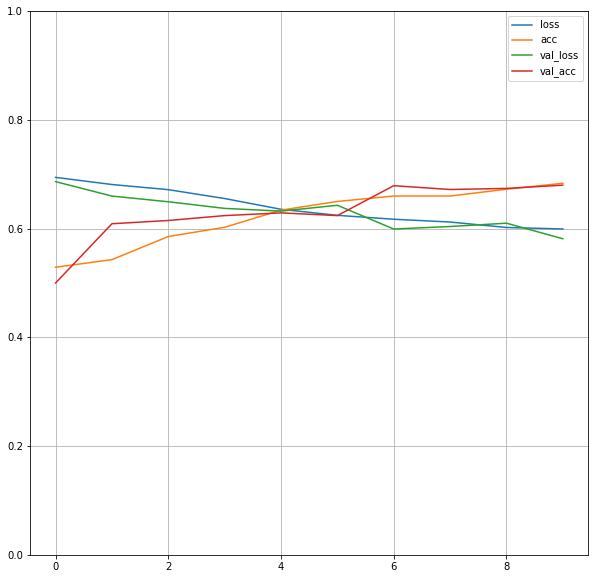

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(model_hist.history).plot(figsize=(10,10))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [ ]:
model.save("models1.")